
# Project: Investigate a Dataset - [Heart attack possibility]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Some Attribute Information:

* chest pain type (4 values)

* serum cholestoral in mg/dl

* fasting blood sugar > 120 mg/dl

* resting electrocardiographic results (values 0,1,2)

* exercise induced angina

* oldpeak = ST depression induced by exercise relative to rest

* the slope of the peak exercise ST segment

* number of major vessels (0-3) colored by flourosopy

* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Question(s) for Analysis
* How many patients have heart attack ?
* What are the possible symptoms of a heart attack?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\FIRST\\AppData\\Local\\Temp\\pip-install-77qs2czi\\pandas_f4186598350c4346a79328a6a82c21fb\\setup.py'"'"'; __file__='"'"'C:\\Users\\FIRST\\AppData\\Local\\Temp\\pip-install-77qs2czi\\pandas_f4186598350c4346a79328a6a82c21fb\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\FIRST\AppData\Local\Temp\pip-wheel-tbrrdw2h'
       cwd: C:\Users\FIRST\AppData\Local\Temp\pip-install-77qs2czi\pandas_f4186598350c4346a79328a6a82c21fb\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copyin

<a id='wrangling'></a>
## Data Wrangling


In [25]:
# Load the data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.shape

(303, 14)

In [28]:
#explore more information about our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No missing values

In [29]:
sum (df.duplicated())

1

1 row duplicated 


### Data Cleaning

In [7]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Now , No duplicated rows 

In [95]:
df=df.rename(columns={'cp':'chest pain','chol':'cholestoral','trestbps':'pressure','thalach':'heartrate'})
df.head(3)

,age,sex,chest pain,pressure,cholestoral,fbs,restecg,heartrate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [9]:
df['sex']=df['sex'].replace([1,0],['male','female'])
df.head(3)

,age,sex,chest pain,pressure,cholestoral,fbs,restecg,heartrate,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1


In [10]:
df['target']=df['target'].replace([1,0],['yes','no'])
df.head(3)

,age,sex,chest pain,pressure,cholestoral,fbs,restecg,heartrate,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,yes
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,yes
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,yes


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How many patients have heart disease ?)

In [11]:
#describe our data 
df.describe()

,age,chest pain,pressure,cholestoral,fbs,restecg,heartrate,exang,oldpeak,slope,ca,thal
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


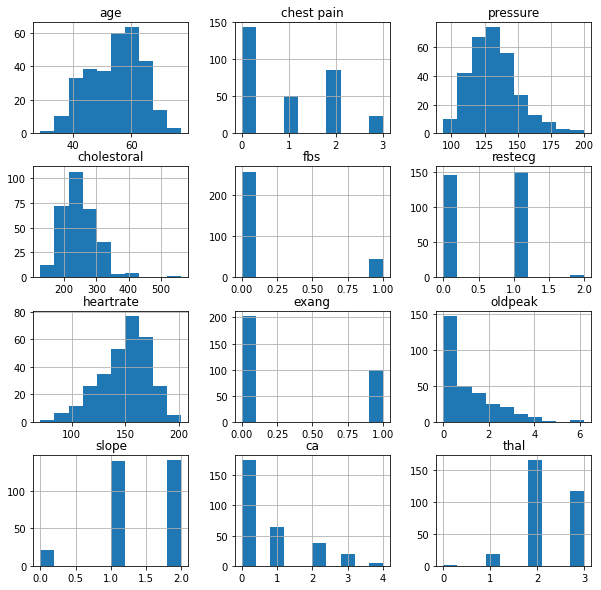

In [12]:
df.hist(figsize=(10,10));

In [13]:
attack=df[df['target']=='yes']
no_attack=df[df['target']=='no']
attack.sex.value_counts()

male      92
female    72
Name: sex, dtype: int64

In [14]:
attack.count()

age            164
sex            164
chest pain     164
pressure       164
cholestoral    164
fbs            164
restecg        164
heartrate      164
exang          164
oldpeak        164
slope          164
ca             164
thal           164
target         164
dtype: int64

In [15]:
no_attack.count()

age            138
sex            138
chest pain     138
pressure       138
cholestoral    138
fbs            138
restecg        138
heartrate      138
exang          138
oldpeak        138
slope          138
ca             138
thal           138
target         138
dtype: int64

164 ot the patients have heart attack , 138 do not have it 

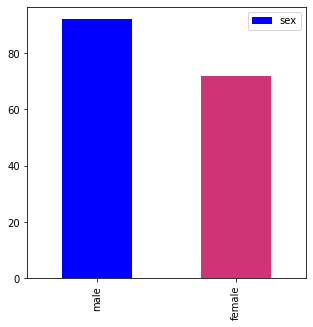

In [16]:
attack['sex'].value_counts().plot(kind='bar',color=['blue','#cf3476'],figsize=(5,5))
plt.legend();

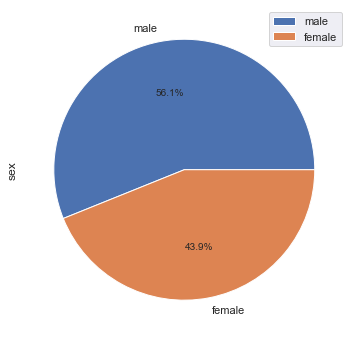

In [43]:
attack['sex'].value_counts().plot(kind='pie',figsize=(6,6) , autopct='%1.1f%%')
plt.legend();

About 56 % of the patient are males 

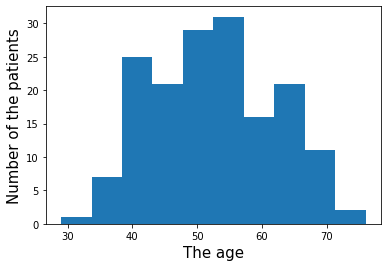

In [18]:
attack['age'].hist()
plt.xlabel('The age',fontsize=15)
plt.ylabel('Number of the patients',fontsize=15)
plt.grid()
plt.show;

 most of patients is over 50 years 

### Research Question 2  (what the relation between the cholestrol and the heart attack)

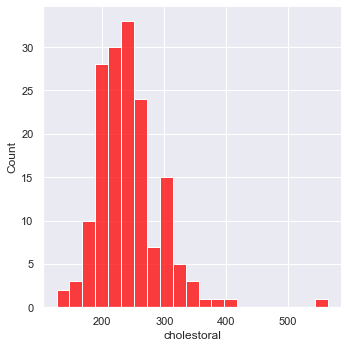

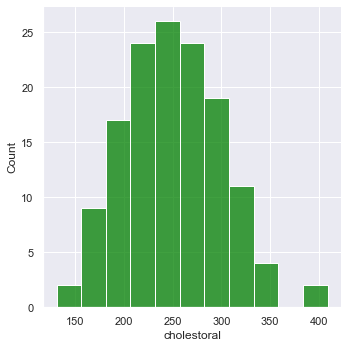

In [19]:
sns.set()
sns.displot(attack['cholestoral'],color='red');
sns.displot(no_attack['cholestoral'],color='green');

We conclude that heart attack is related to high cholesterol

In [20]:
attack['cholestoral'].mean()

242.640243902439

The average of the cholestrol for the heart attack patients is 242.6

### Research Question 3  (what the relation between the pressure and the heart attack)

In [68]:
def plot (xvar):
    """
    "This function Make graphics easier"
    the input is the name of the column 
    the function will return the hist plot
    """
    attack[xvar].hist(label='Attack', color='red')
    no_attack[xvar].hist(label='No attack',color='green')
    plt.xlabel(xvar)
    plt.ylabel('Count')
    plt.title('the relation between the {} and the heart attack'.format(xvar),fontsize=20)
    plt.legend();


In [86]:
def bar (yvar):
        """
    "This function Make graphics easier"
    the input is the name of the column 
    the function will return the bar plot
    """
        attack[yvar].value_counts().plot(kind='bar',label='Attack', color='red')
        no_attack[yvar].value_counts().plot(kind='bar',label='No attack',color='green')
        plt.xlabel(yvar)
        plt.ylabel('Count')
        plt.title('the relation between the {} and the heart attack'.format(yvar) ,fontsize=20)
        plt.legend();

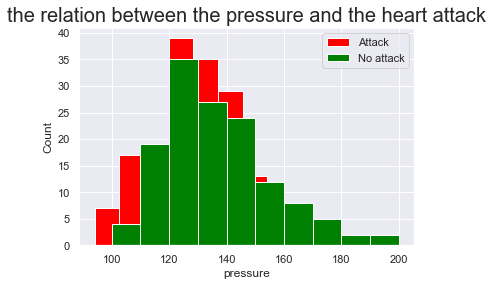

In [69]:
plot('pressure')

In [70]:
no_attack['pressure'].mean()

134.3985507246377

In [71]:
attack['pressure'].mean()

129.25

There is no clear relationship between the pressure and the heart attack

### Research Question 4  (what the relation between the chest pain and the heart attack)


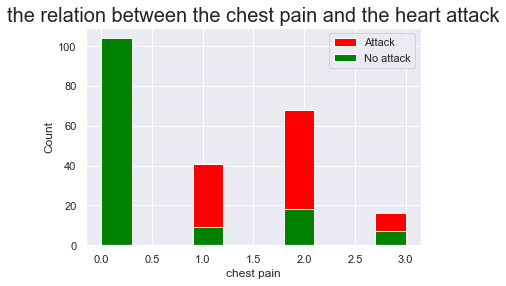

In [88]:
plot('chest pain')

We note that there is a clear relationship between the chest pain and the heart attack

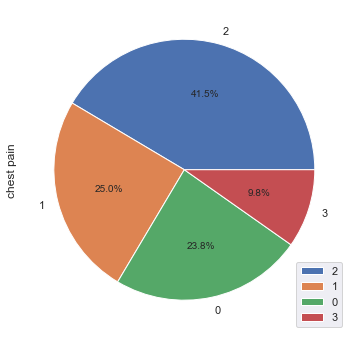

In [73]:
attack['chest pain'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
plt.legend();

**We notice that the most of hreat attack patients have the chest pain from type '2' , about 41.5% 

**about 25% have the chest pain from type '1'

**about 25% have the chest pain from type '0'

**and about 9.8% have the chest pain from type '3' 


### Research Question 5  (what the relation between the resting electrocardiographic results (values 0,1,2) and the heart attack)


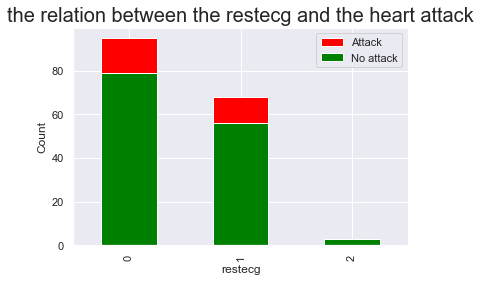

In [89]:
bar('restecg')

more than 80 of heart attack patients have resting electrocardiographic results value: 0
and the others have the value: 1

### Research Question 6  (what the relation between the Heart rate and the heart attack)

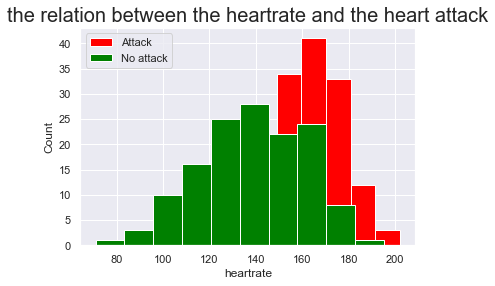

In [75]:
plot('heartrate')

***** Their heart rate is high , at least at least above 140 

### Research Question 7  (what the relation between the fasting blood sugar > 120 mg/dl and the heart attack)

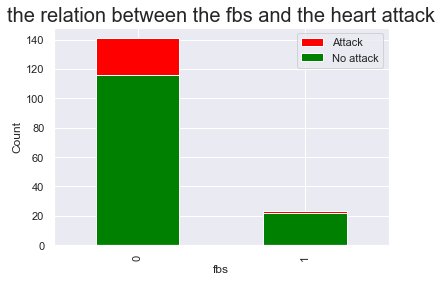

In [96]:
bar('fbs')

We cannot conclude a clear relationship

### Research Question 8 (what the relation between the exercise induced angina and the heart attack)

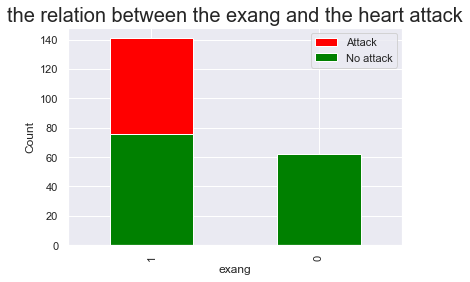

In [93]:
bar('exang')

we notice that all the heart attack patients have the exercise induced angina

### Research Question 8 (what the relation between the thal and the heart attack)

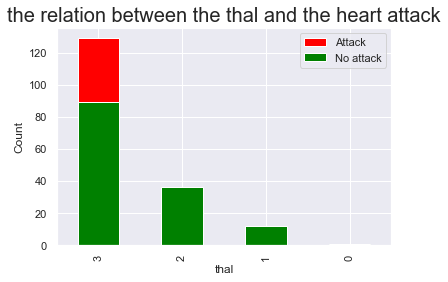

In [94]:
bar('thal')

their thal is often of the type 'reversable defect'

<a id='conclusions'></a>
## Conclusions
### from our data we can conclude that :
* 164 have The risk of getting infected is high 
    * about 56 % of them are males 
    * Most of them are over 50 years 
* The heart attack is related to high cholesterol
    * The average of cholesterol is 242.6
* There is no clear relationship between the pressure and the heat attack 
* We note that there is a clear relationship between the chest pain and the heart attack
    * We notice that the most of hreat attack patients have the chest pain from type '2' , about 41.5% 

    * about 25% have the chest pain from type '1'
 
    * about 25% have the chest pain from type '0'

    * and about 9.8% have the chest pain from type '3'
* more than 80 of heart attack patients have resting electrocardiographic results value: 0,and the others have the value: 1
* Their heart rate is high , at least at least above 140 
* No clear relation between the fasting blood sugar and the heart attack
* we notice that all the heart attack patients have the exercise induced angina
* their thal is often of the type 'reversable defect'



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])